<a href="https://colab.research.google.com/github/cs800-research-spr20/assignments/blob/master/CS800_Week_06_RTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 800 R Tutorial

We'll be doing some of the exercises from [R for Data Science](https://r4ds.had.co.nz) to get an introduction to R. We'll do this in Google Colab, but the commands can also be run locally using RStudio.

There are a ton of references available for R and since it's popular, you can pretty much search for whatever you want and find something close.

There are some examples of more of the statistical functions at
https://www.cs.odu.edu/~mweigle/courses/cs795/mklein-IntroR/lecture/

## First Thing

Install and load the tidyverse package.

In [1]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



*Repeat the HW0 steps from [Section 3.2 First steps](https://r4ds.had.co.nz/data-visualisation.html#first-steps)*

Note that for any of these charts, choose 'Open Image in New Tab' for a larger version that you can save as a PNG.

In [0]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

**HW0, Q7:** *Create a scatterplot of hwy vs. cyl.*

In [0]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = cyl))

## Basic Data Visualization in R

### Aesthetic mappings

*After repeating the HW0 setup, we'll pick up in [Section 3.3, Aesthetic mappings](https://r4ds.had.co.nz/data-visualisation.html#aesthetic-mappings)*

First, let's get a reminder of what's in the `mpg` dataset.  This command will pop up a help window with a description of the dataset.

In [0]:
?ggplot2::mpg

Here we'll print out what's in the `mpg` dataset.  Note that this is a "tibble" instead of a regular R "dataframe".  

If you're not familiar with either of these terms, don't worry about it.  If you are familiar with dataframes, then here's a description of the differences: https://r4ds.had.co.nz/tibbles.html#tibbles-vs.data.frame

In [0]:
mpg

Map the colors of datapoints to the `class` variable, indicating the class of each vehicle.

In [0]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

Make all of the points blue.  Notice the difference in the placement of the color setting. It applies to all the dots and is not based on any data item.

In [0]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

*This will generate an error.  Why?*

In [0]:
ggplot(data = mpg) 
+ geom_point(mapping = aes(x = displ, y = hwy))

### Facets
*Moving to [Section 3.5 Facets](https://r4ds.had.co.nz/data-visualisation.html#facets)*

We can create "small multiples" to show the data in separate charts. Note that both the x-axis range and the y-axis range is the same in all of the charts.

The only thing we've added here is the `facet_wrap` function.  It says to divide the charts by `class` and use 2 rows to display them.

In [0]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

### Statistical transformations

[Section 3.7](https://r4ds.had.co.nz/data-visualisation.html#statistical-transformations)

Time to look at bar charts and histograms.  We'll use a different dataset, describing diamonds.

In [0]:
?ggplot2::diamonds

The chart below uses `geom_bar` to generate a count of items with each type of cut.

In [0]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))

We can also use the `stat_count` function to generate the same chart.

In [0]:
ggplot(data = diamonds) + 
  stat_count(mapping = aes(x = cut))

We can use `stat_summary` to generate other summary statistics about the dataset. This is setting the min value of the line to the min value of `depth`, max to the max value, and the dot to the median value.


In [0]:
ggplot(data = diamonds) + 
  stat_summary(
    mapping = aes(x = cut, y = depth),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

*For more information on the stat functions available, see the [ggplot2 cheatsheet](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf).*

## Workflow: basics

[Section 4](https://r4ds.had.co.nz/workflow-basics.html)

*Now that we've made some charts, let go back to basics.*

Using R as a calculator:

In [0]:
1 / 200 * 30
(59 + 73 + 2) / 3
sin(pi/2)

**Important:** Variable assignment is done with `<-`, not with `=`

In [0]:
x <- 3*4
x

## Working with Data

[Section 5](https://r4ds.had.co.nz/transform.html) - uses the `flights` dataset and introduces filter(), arrange(), select()

In [0]:
install.packages("nycflights13")
library(nycflights13)
?nycflights13::flights

`filter()`  allows you to subset observations based on their values. 

In [0]:
filter(flights, month==1, day==1)

`arrange()` lets you sort rows (rather than filtering them out, just rearrange them.

In [0]:
arrange(flights, year, month, day)

`select()` lets you pick only certain columns

In [0]:
select(flights, year, month, day, tailnum)

Finally, we'll use `summarize()` and `group_by()` to perform summary operations on selected data.

This will compute the average departure delay by month.  (`na.rm = TRUE` just means to ignore any rows that have `NA` values)

In [0]:
by_month = group_by(flights, year, month)
summarize(by_month, delay = mean(dep_delay, na.rm = TRUE))

Here are a couple shortcut notations:
* `$` - allows you to reference a particular column (without having to use `filter()`)
* `%>%` - like a pipe (`|`) in unix

Here we're going to compute the average delay for all Delta flights.

In [0]:
delta = filter(flights, carrier=="DL")
mean(delta$dep_delay, na.rm=TRUE)

The pipe is just a shortcut.  This is the same result as above to compute the average departure delay by month.

You can omit the first parameter (dataset) and it's assumed that the data is coming from the pipe input.

In [0]:
group_by(flights, year, month) %>% summarize(delay = mean(dep_delay, na.rm = TRUE))

## Data Import

[Section 11](https://r4ds.had.co.nz/data-import.html) - getting data into R, reading CSV

The main function we'll look at is `read_csv()` to read in comma-separated files, but there are several others described in this section.

We can't mount Google Drive in Colab with R, but we can read CSVs that are online.

In [0]:
stars = read_csv("https://raw.githubusercontent.com/cs625-datavis-fall19/assignments/master/stars.csv")

Once this is read in, you can use all of the other functions that we've covered.

In [0]:
filter(stars, temp > 5000)

## Chart Labels

[Section 28](https://r4ds.had.co.nz/graphics-for-communication.html#label) Graphics for Communication

It's important to have good chart titles and labels.

In [0]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

Let's add a title and caption.

In [0]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class)) +
  labs(
    title="Fuel efficiency decreases with engine size",
    caption = "Data from fueleconomy.gov"
  )

Now let's change the axis labels.

In [0]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class)) +
  labs(
    title="Fuel efficiency decreases with engine size",
    caption = "Data from fueleconomy.gov",
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    color = "Car type"
  )

## Data Analysis Walkthrough

Now we're going to take a dataset and walk through generating some basic statistics and charts.

stats
* mean
* standard deviation
* median
* mode

charts
* error bar chart showing the mean and std dev
* histogram visualizing the distribution of values for a single variable
* box plot visualizing the distribution of values for a single variable
* scatterplot visualizing the distribution of values for one variable vs. a second variable
* line chart showing the values of data vs. time


In [4]:
install.packages("dslabs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(dslabs)

We're going to use the `murders` dataset for most of these. This is the FBI dataset for gun murders in the US in 2010. It is broken down by each state and includes the state population.

In [9]:
head(murders)

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


Here we'll compute mean, standard deviation, median, and mode (most common value).

In [10]:
mean(murders$total)

[1] 184.3725

In [15]:
sd(murders$total)

[1] 236.1261

In [13]:
median(murders$total)

[1] 97

There's no built-in mode function in R, so we write our own.

In [16]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
getmode(murders$total)

[1] 93

Histogram

Box plot

Scatterplot

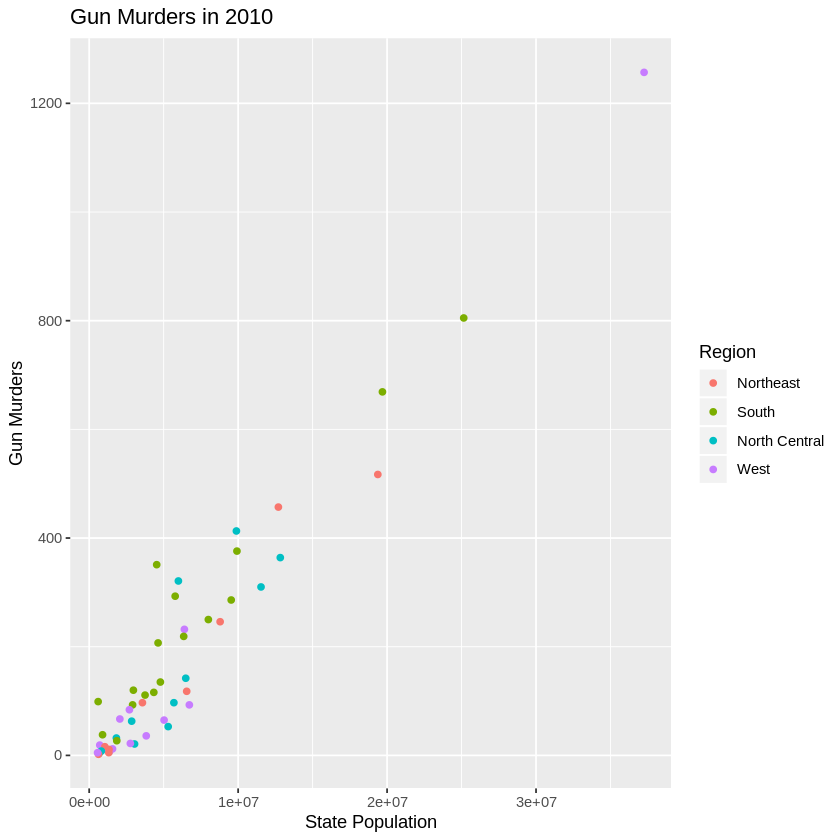

In [26]:
ggplot(data = murders) + 
  geom_point(mapping = aes(x = population, y = total, color=region)) + 
  labs(
    title="Gun Murders in 2010",
    x = "State Population",
    y = "Gun Murders",
    color = "Region"
  )

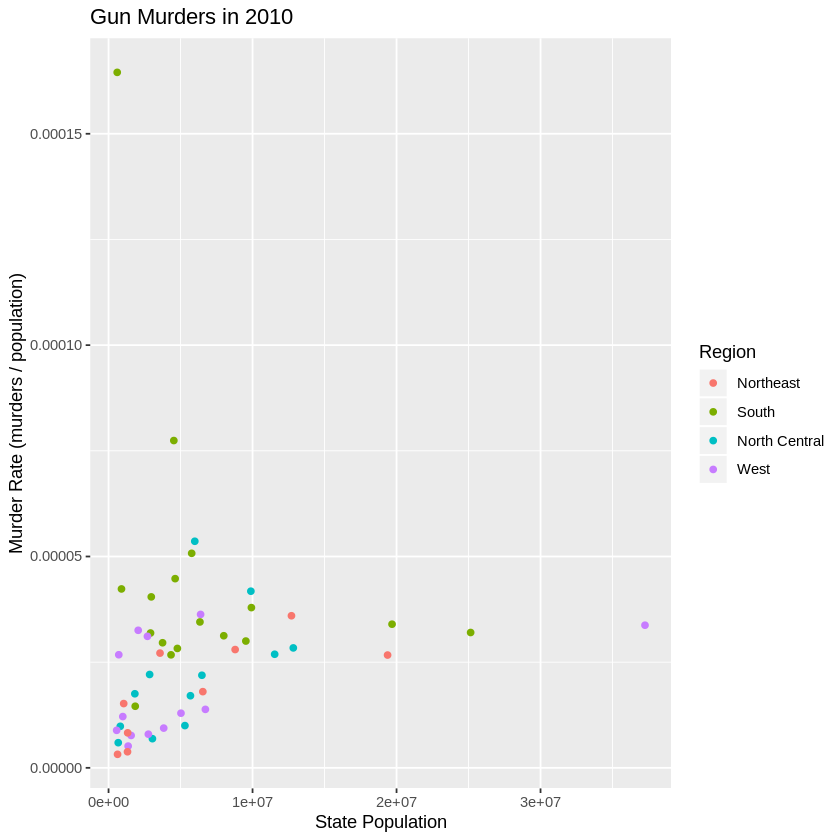

In [27]:
ggplot(data = murders) + 
  geom_point(mapping = aes(x = population, y = total/population, color=region)) + 
  labs(
    title="Gun Murders in 2010 ",
    x = "State Population",
    y = "Murder Rate (murders / population)",
    color = "Region"
  )

We want to do a line chart, but this isn't the right kind of data for that, so we'll load in a different dataset.  

The `polls_2008` dataset is showing the number of days until the 2008 US Presidential Election Day (in negative numbers) and the average poll margin between Obama and McCain on that day.

In [18]:
head(polls_2008)

day,margin
<dbl>,<dbl>
-155,0.020
-153,0.030
-152,0.065
-151,0.060
-150,0.070
-149,0.050


Line chart